In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/Users/jkenglish/Desktop/StormEvents_Combined/StormEvents_Combined.csv')

df

,Unnamed: 0,STATE,YEAR,MONTH_NAME,EVENT_TYPE,COUNTY_NAME,COUNTY_TIMEZONE,DAMAGE_PROPERTY,DAMAGE_CROPS
0,0,NEW HAMPSHIRE,2013,February,Winter Weather,EASTERN HILLSBOROUGH,EST-5,0.0,0.0
1,1,NEW HAMPSHIRE,2013,December,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0
2,2,NEW HAMPSHIRE,2013,March,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0
3,3,NEW HAMPSHIRE,2013,October,Strong Wind,EASTERN HILLSBOROUGH,EST-5,3000.0,0.0
4,4,NEW HAMPSHIRE,2013,February,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0
...,...,...,...,...,...,...,...,...,...
608742,56395,IOWA,2006,October,Hail,MITCHELL,CST-6,65000.0,80000.0
608743,56396,IOWA,2006,October,Hail,HOWARD,CST-6,50000.0,75000.0
608744,56397,IOWA,2006,October,Hail,WINNESHIEK,CST-6,5000.0,10000.0
608745,56398,IOWA,2006,October,Hail,MITCHELL,CST-6,80000.0,100000.0


In [3]:
df.shape

(608747, 9)

In [4]:
df2 = df.drop(['Unnamed: 0'],axis=1)

df2

,STATE,YEAR,MONTH_NAME,EVENT_TYPE,COUNTY_NAME,COUNTY_TIMEZONE,DAMAGE_PROPERTY,DAMAGE_CROPS
0,NEW HAMPSHIRE,2013,February,Winter Weather,EASTERN HILLSBOROUGH,EST-5,0.0,0.0
1,NEW HAMPSHIRE,2013,December,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0
2,NEW HAMPSHIRE,2013,March,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0
3,NEW HAMPSHIRE,2013,October,Strong Wind,EASTERN HILLSBOROUGH,EST-5,3000.0,0.0
4,NEW HAMPSHIRE,2013,February,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0
...,...,...,...,...,...,...,...,...
608742,IOWA,2006,October,Hail,MITCHELL,CST-6,65000.0,80000.0
608743,IOWA,2006,October,Hail,HOWARD,CST-6,50000.0,75000.0
608744,IOWA,2006,October,Hail,WINNESHIEK,CST-6,5000.0,10000.0
608745,IOWA,2006,October,Hail,MITCHELL,CST-6,80000.0,100000.0


In [5]:
df2.shape

(608747, 8)

In [6]:
df2['STATE'].unique()

array(['NEW HAMPSHIRE', 'MISSOURI', 'KANSAS', 'TEXAS', 'HAWAII',
       'COLORADO', 'ILLINOIS', 'MONTANA', 'MICHIGAN', 'WYOMING',
       'MARYLAND', 'VIRGINIA', 'IOWA', 'NEBRASKA', 'LAKE ST CLAIR',
       'LAKE HURON', 'DISTRICT OF COLUMBIA', 'NEW YORK', 'PENNSYLVANIA',
       'ATLANTIC NORTH', 'GULF OF MEXICO', 'NEW MEXICO', 'OKLAHOMA',
       'WEST VIRGINIA', 'WISCONSIN', 'MINNESOTA', 'ARKANSAS',
       'MISSISSIPPI', 'GEORGIA', 'TENNESSEE', 'LAKE SUPERIOR',
       'RHODE ISLAND', 'MASSACHUSETTS', 'FLORIDA', 'ALABAMA', 'MAINE',
       'ARIZONA', 'OHIO', 'VERMONT', 'LOUISIANA', 'INDIANA',
       'NORTH CAROLINA', 'SOUTH DAKOTA', 'CALIFORNIA', 'UTAH',
       'NORTH DAKOTA', 'KENTUCKY', 'ATLANTIC SOUTH', 'IDAHO',
       'CONNECTICUT', 'LAKE MICHIGAN', 'OREGON', 'ALASKA',
       'SOUTH CAROLINA', 'AMERICAN SAMOA', 'NEVADA', 'WASHINGTON', 'GUAM',
       'HAWAII WATERS', 'PUERTO RICO', 'VIRGIN ISLANDS', 'NEW JERSEY',
       'LAKE ERIE', 'E PACIFIC', 'DELAWARE', 'LAKE ONTARIO',
       'GULF

In [7]:
df2['EVENT_TYPE'].unique()

array(['Winter Weather', 'Heavy Snow', 'Strong Wind', 'High Wind',
       'Blizzard', 'Hail', 'Flood', 'Thunderstorm Wind', 'Drought',
       'High Surf', 'Winter Storm', 'Flash Flood', 'Tornado', 'Dense Fog',
       'Marine Thunderstorm Wind', 'Debris Flow', 'Excessive Heat',
       'Cold/Wind Chill', 'Lake-Effect Snow', 'Ice Storm',
       'Marine High Wind', 'Heavy Rain', 'Funnel Cloud', 'Rip Current',
       'Waterspout', 'Frost/Freeze', 'Wildfire', 'Lightning',
       'Dust Storm', 'Heat', 'Extreme Cold/Wind Chill', 'Coastal Flood',
       'Tropical Storm', 'Dust Devil', 'Avalanche', 'Marine Hail',
       'Marine Dense Fog', 'Marine Strong Wind', 'Hurricane',
       'Freezing Fog', 'Astronomical Low Tide', 'Sleet', 'Tsunami',
       'Sneakerwave', 'Storm Surge/Tide', 'Dense Smoke', 'Seiche',
       'Volcanic Ashfall', 'Landslide', 'Tropical Depression',
       'Hurricane (Typhoon)', 'Marine Tropical Storm',
       'Marine Hurricane/Typhoon', 'HAIL FLOODING',
       'THUNDERSTORM W

In [8]:
df2['COUNTY_NAME'].unique()

array(['EASTERN HILLSBOROUGH', 'HARRISON', 'JOHNSON', ...,
       'STONINGTON (DEER ISLE) ME TO MERRIMACK RIVER MA 25 TO 40NM',
       'WEST COLUMBIA RIVER GORGE',
       'LE WILLOWICK TO GENEVA ON THE LAKE OH BYD 5NM OFFSHORE TO INTL BORDER'],
      dtype=object)

In [9]:
df2['MONTH_NAME'].unique()

array(['February', 'December', 'March', 'October', 'November', 'January',
       'June', 'May', 'April', 'August', 'July', 'September'],
      dtype=object)

In [10]:
df2['COUNTY_NAME'].value_counts()

FRANKLIN                                                                 4704
WASHINGTON                                                               4598
JEFFERSON                                                                4509
JACKSON                                                                  4358
MADISON                                                                  3840
                                                                         ... 
Michigan City in to New Buffalo MI                                          1
Central Willamette Valley                                                   1
Harris                                                                      1
Lower Chehalis Valley Area                                                  1
LE WILLOWICK TO GENEVA ON THE LAKE OH BYD 5NM OFFSHORE TO INTL BORDER       1
Name: COUNTY_NAME, Length: 4893, dtype: int64

In [11]:
df2['COUNTY_NAME'].shape

(608747,)

In [12]:
df2['COUNTY_NAME']

0         EASTERN HILLSBOROUGH
1         EASTERN HILLSBOROUGH
2         EASTERN HILLSBOROUGH
3         EASTERN HILLSBOROUGH
4         EASTERN HILLSBOROUGH
                  ...         
608742                MITCHELL
608743                  HOWARD
608744              WINNESHIEK
608745                MITCHELL
608746                   ADAMS
Name: COUNTY_NAME, Length: 608747, dtype: object

In [44]:
#random_data = np.random.randint(0,608747,size=(608747,))

#random_data

In [27]:
#df2['COUNTY_NAME'] = random_data

In [13]:
df3 = df2.drop(['COUNTY_TIMEZONE','DAMAGE_CROPS','COUNTY_NAME'],axis=1)

df3


,STATE,YEAR,MONTH_NAME,EVENT_TYPE,DAMAGE_PROPERTY
0,NEW HAMPSHIRE,2013,February,Winter Weather,0.0
1,NEW HAMPSHIRE,2013,December,Heavy Snow,0.0
2,NEW HAMPSHIRE,2013,March,Heavy Snow,0.0
3,NEW HAMPSHIRE,2013,October,Strong Wind,3000.0
4,NEW HAMPSHIRE,2013,February,Heavy Snow,0.0
...,...,...,...,...,...
608742,IOWA,2006,October,Hail,65000.0
608743,IOWA,2006,October,Hail,50000.0
608744,IOWA,2006,October,Hail,5000.0
608745,IOWA,2006,October,Hail,80000.0


In [14]:
label_encoder = LabelEncoder()


df3['STATE'] = label_encoder.fit_transform(df3['STATE'])

df3['EVENT_TYPE'] = label_encoder.fit_transform(df3['EVENT_TYPE'])

df3['MONTH_NAME'] = label_encoder.fit_transform(df3['MONTH_NAME'])


In [15]:
df4 = df3

df4



,STATE,YEAR,MONTH_NAME,EVENT_TYPE,DAMAGE_PROPERTY
0,43,2013,3,68,0.0
1,43,2013,2,23,0.0
2,43,2013,7,23,0.0
3,43,2013,10,47,3000.0
4,43,2013,3,23,0.0
...,...,...,...,...,...
608742,23,2006,10,20,65000.0
608743,23,2006,10,20,50000.0
608744,23,2006,10,20,5000.0
608745,23,2006,10,20,80000.0


In [16]:
df4['STATE'].unique()

array([43, 39, 24, 59, 18,  8, 21, 40, 36, 67, 34, 63, 23, 41, 30, 27, 11,
       46, 52,  5, 17, 45, 50, 65, 66, 37,  4, 38, 14, 58, 31, 54, 35, 13,
        0, 33,  3, 49, 61, 32, 22, 47, 56,  7, 60, 48, 25,  6, 20,  9, 28,
       51,  1, 55,  2, 42, 64, 15, 19, 53, 62, 44, 26, 12, 10, 29, 16, 57])

In [17]:
df4['MONTH_NAME'].unique()

array([ 3,  2,  7, 10,  9,  4,  6,  8,  0,  1,  5, 11])

In [18]:
df4['EVENT_TYPE'].unique()

array([68, 23, 47, 25,  2, 20, 14, 59,  8, 24, 67, 13, 60,  6, 39,  5, 11,
        4, 29, 28, 35, 22, 17, 42, 65, 16, 66, 32, 10, 21, 12,  3, 62,  9,
        1, 34, 33, 38, 26, 15,  0, 44, 63, 45, 46,  7, 43, 64, 31, 61, 27,
       41, 36, 18, 54, 52, 49, 48, 50, 57, 56, 51, 53, 30, 40, 58, 55, 19,
       37])

In [20]:
df4.to_csv('/Users/jkenglish/Desktop/VS_Projects/Streamlit/df4.csv')




In [19]:

X = df4.drop('DAMAGE_PROPERTY',axis=1)

y = df4['DAMAGE_PROPERTY']






In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [21]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(X_train,y_train)

predict_linear = linear_reg.predict(X_test)




In [22]:
error = np.sqrt(mean_squared_error(y_test,predict_linear))

print("${:,.02f}".format(error))

$39,956,655.13


In [23]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor(random_state=0)

dec_tree_reg.fit(X_train,y_train)

predict_dectree = dec_tree_reg.predict(X_test)



In [24]:
error = np.sqrt(mean_squared_error(y_test,predict_dectree))

print("${:,.02f}".format(error))

$38,054,431.79


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost_reg = GradientBoostingRegressor(random_state=0)


grad_boost_reg.fit(X_train,y_train)


predict_grad_boost_reg = grad_boost_reg.predict(X_test)


In [26]:
error = np.sqrt(mean_squared_error(y_test,predict_grad_boost_reg))

print("${:,.02f}".format(error))

$39,721,021.58


In [27]:
from sklearn.ensemble import AdaBoostRegressor

ada_boost_reg = AdaBoostRegressor(random_state=0)


ada_boost_reg.fit(X_train,y_train)


predict_ada_boost_reg = ada_boost_reg.predict(X_test)





In [28]:
error = np.sqrt(mean_squared_error(y_test,predict_ada_boost_reg))

print("${:,.02f}".format(error))

$50,930,435.88


In [29]:
from sklearn.neighbors import KNeighborsRegressor


kneighbors_reg = KNeighborsRegressor()


kneighbors_reg.fit(X_train,y_train)


predict_kneighbors_reg = kneighbors_reg.predict(X_test)





In [30]:
error = np.sqrt(mean_squared_error(y_test,predict_kneighbors_reg))

print("${:,.02f}".format(error))

$40,212,218.11


In [31]:
from sklearn.ensemble import ExtraTreesRegressor


extratrees_reg = ExtraTreesRegressor()


extratrees_reg.fit(X_train,y_train)


predict_extratrees_reg = extratrees_reg.predict(X_test)




In [32]:
error = np.sqrt(mean_squared_error(y_test,predict_extratrees_reg))

print("${:,.02f}".format(error))

$38,051,267.20


In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
#Xgboost Regressor


from xgboost.sklearn import XGBRegressor

xgb_reg = XGBRegressor()


xgb_reg.fit(X_train,y_train)


predict_xgb_reg = xgb_reg.predict(X_test)




In [35]:
error = np.sqrt(mean_squared_error(y_test,predict_xgb_reg))

print("${:,.02f}".format(error))


$38,037,018.79


In [36]:
#Bayesian Ridge

from sklearn.linear_model import BayesianRidge

bayesian_ridge = BayesianRidge()


bayesian_ridge.fit(X_train,y_train)


predict_bayesian_ridge = bayesian_ridge.predict(X_test)




In [37]:
error = np.sqrt(mean_squared_error(y_test,predict_bayesian_ridge))

print("${:,.02f}".format(error))


$39,957,585.09


In [42]:
#Elastic Net Regression

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()


elasticnet.fit(X_train,y_train)


predict_elasticnet = elasticnet.predict(X_test)




In [43]:
error = np.sqrt(mean_squared_error(y_test,predict_elasticnet))

print("${:,.02f}".format(error))


$39,956,642.57


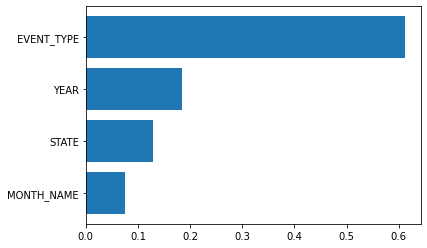

In [38]:
importances = grad_boost_reg.feature_importances_


indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X.columns)[indices])